<a href="https://colab.research.google.com/github/swarna32/plant-species-identification/blob/main/plant_species_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/prl/all.csv')
image_dir = '/content/drive/MyDrive/PRL/Leaves/'

In [ ]:
image_size = (64, 64)
batch_size = 32
df['y'] = df['y'].astype(str)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='id',
    y_col='y',
    target_size=image_size,
    batch_size=batch_size,
    subset='training'
)
validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='id',
    y_col='y',
    target_size=image_size,
    batch_size=batch_size,
    subset='validation'
)

Found 1526 validated image filenames belonging to 32 classes.
Found 381 validated image filenames belonging to 32 classes.


In [ ]:
#Building the CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)




Epoch 1/10
47/47 [==============================] - 697s 15s/step - loss: 2.9378 - accuracy: 0.1941 - val_loss: 1.8909 - val_accuracy: 0.4489
Epoch 2/10
47/47 [==============================] - 55s 1s/step - loss: 1.4018 - accuracy: 0.5649 - val_loss: 1.1162 - val_accuracy: 0.6761
Epoch 3/10
47/47 [==============================] - 52s 1s/step - loss: 0.8380 - accuracy: 0.7369 - val_loss: 0.9357 - val_accuracy: 0.7159
Epoch 4/10
47/47 [==============================] - 52s 1s/step - loss: 0.5617 - accuracy: 0.8153 - val_loss: 0.7808 - val_accuracy: 0.7472
Epoch 5/10
47/47 [==============================] - 52s 1s/step - loss: 0.4375 - accuracy: 0.8608 - val_loss: 0.7008 - val_accuracy: 0.7614
Epoch 6/10
47/47 [==============================] - 52s 1s/step - loss: 0.3243 - accuracy: 0.8876 - val_loss: 0.6582 - val_accuracy: 0.7898
Epoch 7/10
47/47 [==============================] - 53s 1s/step - loss: 0.3326 - accuracy: 0.8922 - val_loss: 0.7553 - val_accuracy: 0.7841
Epoch 8/10
47/47 [

In [ ]:
test_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='id',
    y_col='y',
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    shuffle=False
)
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Found 381 validated image filenames belonging to 32 classes.
12/12 [==============================] - 10s 841ms/step - loss: 0.4919 - accuracy: 0.8635
Test loss: 0.4919
Test accuracy: 0.8635


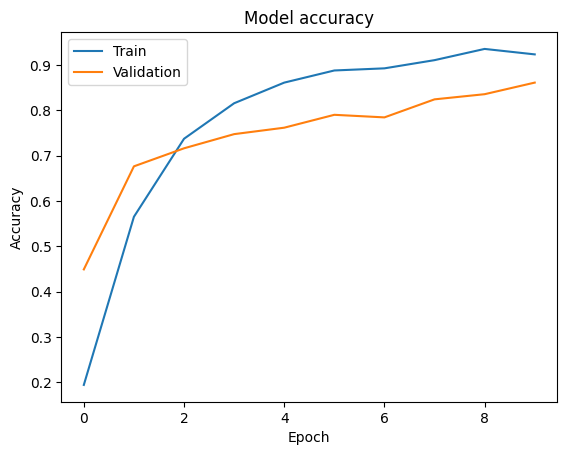

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

12/12 [==============================] - 11s 840ms/step
Accuracy: 86.35%
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      0.17      0.29        12
           2       0.92      0.92      0.92        12
           3       0.95      0.95      0.95        20
           4       0.89      0.89      0.89         9
           5       1.00      0.91      0.95        11
           6       0.76      1.00      0.87        13
           7       0.92      0.92      0.92        13
           8       0.94      1.00      0.97        15
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00        11
          11       0.80      0.80      0.80        10
          12       0.75      1.00      0.86         6
          13       0.88      0.93      0.90        15
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00        11
        

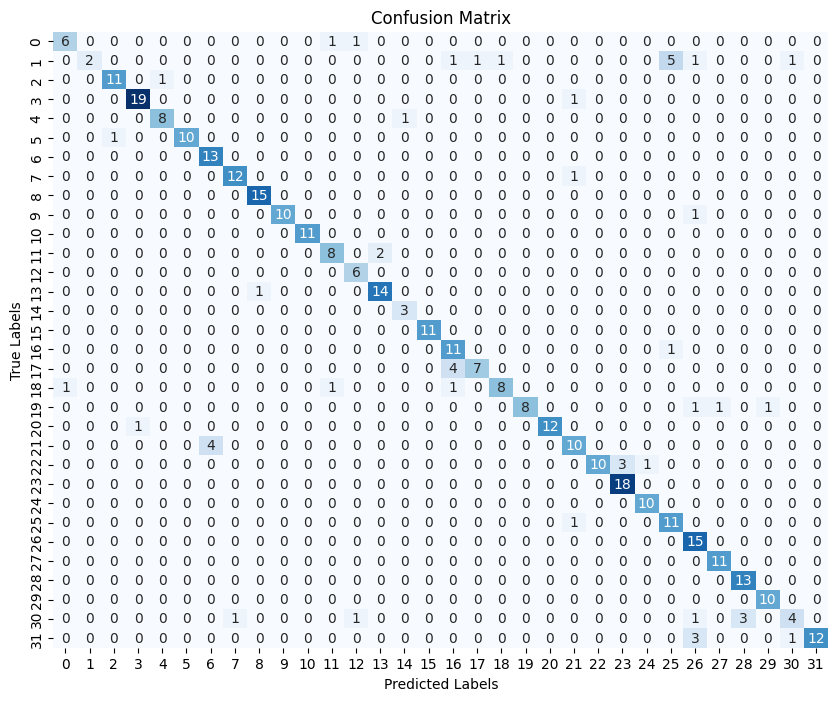

In [ ]:
from sklearn.metrics import accuracy_score

# Get the predictions for the test set
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = test_generator.classes

# Calculate accuracy from the confusion matrix
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

# Print classification report
print(classification_report(y_true, y_pred))
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
